# Lab 02

<div class="alert alert-warning">
혹시 수식이나 표가 제대로 보이지 않는다면 상단의 View - Actiavte Command Palette 메뉴에서 "Trust Notebook" 명령을 찾아서 실행하기 바랍니다.
</div>

<div class="alert alert-info">
일부 코드가 `#= .. =#`와 같은 형태로 비워져 있는 부분이 있다면 실습 시간 혹은 이후에 해당 부분을 채워넣은 다음 LMS의 레포트 제출 게시판을 통해 정해진 기간 내에 제출하기 바랍니다.
</div>

Plant Growth Functions

In [1]:
using Cropbox

In [2]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

## 1. Growth Equations

### 1.1. Exponential Growth Equation

- Eq

$$
\frac{dW}{dt} = \mu W
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | - | Time unit used in the model |
| $\mu$ | 0.3 | - | Specific growth rate |
| $W_0$ | 1 | - | Dry mass at time $t = 0$ |
| $W$ | - | - | Current dry mass |

In [3]:
@system Expo(Controller) begin
    μ       => 0.3 ~ preserve(parameter)
    W0      => 1   ~ preserve(parameter)
    W(μ, W) => μ*W ~ accumulate(init = W0)

    t(context.clock.tick) ~ track
end

Expo

In [4]:
r11 = simulate(Expo, stop = 10)

Row,time,μ,W0,W,t
,Quantity…,Float64,Float64,Float64,Float64
1,0.0 hr,0.3,1.0,1.0,0.0
2,1.0 hr,0.3,1.0,1.3,1.0
3,2.0 hr,0.3,1.0,1.69,2.0
4,3.0 hr,0.3,1.0,2.197,3.0
5,4.0 hr,0.3,1.0,2.8561,4.0
6,5.0 hr,0.3,1.0,3.71293,5.0
7,6.0 hr,0.3,1.0,4.82681,6.0
8,7.0 hr,0.3,1.0,6.27485,7.0
9,8.0 hr,0.3,1.0,8.15731,8.0


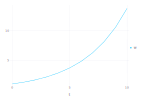

In [5]:
visualize(r11, :t, :W, kind = :line)

In [6]:
c11 = @config Expo => (
    :μ  => 0.5,
    :W0 => 0.1,
)

μ,=,0.5
W0,=,0.1


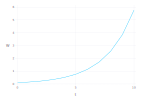

In [7]:
visualize(Expo, :t, :W, config = c11, stop = 10, kind = :line)

In [8]:
manipulate(Expo, :t, :W;
    parameters = Expo => (;
        :μ  => 0:0.01:0.1,
        :W0 => 0:0.1:10,
    ),
    stop = 100,
    kind = :line,
    ylim = (0, 100),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Expo"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(6), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000ffff61b4d370, Task (runnable) @0x0000ffff61b4d370), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 141733920768)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringifie

## 1.2. Monomolecular Equation

- Eq

$$
\begin{align}
\frac{dW}{dt} &= k S \\
S &= W_f - W
\end{align}
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | - | Time unit used in the model |
| $k$ | 0.2 | - | Proportion of substrate ($S$) utilized per unit time |
| $W_0$ | 1 | - | Dry mass at time $t = 0$ |
| $W_f$ | 100 | - | Final value of $W$ as $t$ approaches $\infty$ |
| $W$ | - | - | Current dry mass |

In [9]:
@system Mono(Controller) begin
    t(context.clock.tick) ~ track

    k        => 0.2  ~ preserve(parameter)
    W0       => 1    ~ preserve(parameter)
    Wf       => 100  ~ preserve(parameter)

    W(k, S)  => k*S    ~ accumulate(init = W0)
    S(Wf, W) => Wf - W ~ track
end

Mono

In [10]:
r12 = simulate(Mono, stop = 20)

Row,time,t,k,W0,Wf,W,S
,Quantity…,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0 hr,0.0,0.2,1.0,100.0,1.0,99.0
2,1.0 hr,1.0,0.2,1.0,100.0,20.8,79.2
3,2.0 hr,2.0,0.2,1.0,100.0,36.64,63.36
4,3.0 hr,3.0,0.2,1.0,100.0,49.312,50.688
5,4.0 hr,4.0,0.2,1.0,100.0,59.4496,40.5504
6,5.0 hr,5.0,0.2,1.0,100.0,67.5597,32.4403
7,6.0 hr,6.0,0.2,1.0,100.0,74.0477,25.9523
8,7.0 hr,7.0,0.2,1.0,100.0,79.2382,20.7618
9,8.0 hr,8.0,0.2,1.0,100.0,83.3906,16.6094


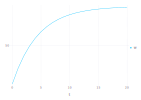

In [11]:
visualize(r12, :t, :W, kind = :line)

In [12]:
manipulate(Mono, :t, :W;
    parameters = Mono => (;
        :k  => 0:0.01:0.5,
        :W0 => 0:0.1:10,
        :Wf => 10:10:200,
    ),
    stop = 100,
    kind = :line,
    ylim = (0, 200),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Mono"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(26), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000ffff61b79560, Task (runnable) @0x0000ffff61b79560), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 280517199003648)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: string

## 1.3. Logistic Growth Equation

- Eq

$$
\frac{dW}{dt} = \mu W \left( 1 - \frac{W}{W_f} \right)
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | - | Time unit used in the model |
| $\mu$ | 0.3 | - | Specific growth rate |
| $W_0$ | 1 | - | Dry mass at time $t = 0$ |
| $W_f$ | 100 | - | Final value of $W$ as $t$ approaches $\infty$ |
| $W$ | - | - | Current dry mass |

In [13]:
@system Logi(Controller) begin
    t(context.clock.tick) ~ track

    μ        => 0.3  ~ preserve(parameter)
    W0       => 1    ~ preserve(parameter)
    Wf       => 100  ~ preserve(parameter)

    W(μ, W, Wf) => μ*W * (1 - W/Wf) ~ accumulate(init = W0)
end

Logi

In [14]:
r13 = simulate(Logi, stop = 50)

Row,time,t,μ,W0,Wf,W
,Quantity…,Float64,Float64,Float64,Float64,Float64
1,0.0 hr,0.0,0.3,1.0,100.0,1.0
2,1.0 hr,1.0,0.3,1.0,100.0,1.297
3,2.0 hr,2.0,0.3,1.0,100.0,1.68105
4,3.0 hr,3.0,0.3,1.0,100.0,2.17689
5,4.0 hr,4.0,0.3,1.0,100.0,2.81574
6,5.0 hr,5.0,0.3,1.0,100.0,3.63668
7,6.0 hr,6.0,0.3,1.0,100.0,4.68801
8,7.0 hr,7.0,0.3,1.0,100.0,6.02848
9,8.0 hr,8.0,0.3,1.0,100.0,7.72799


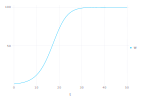

In [15]:
visualize(r13, :t, :W, kind = :line)

In [16]:
manipulate(Logi, :t, :W;
    parameters = Logi => (;
        :μ  => 0:0.01:0.5,
        :W0 => 0:0.1:10,
        :Wf => 10:10:200,
    ),
    stop = 100,
    kind = :line,
    ylim = (0, 200),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Logi"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(26), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000ffff5c6f68c0, Task (runnable) @0x0000ffff5c6f68c0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 141733920768)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringifi

## 1.4. Gompertz Growth Equation

- Eq

$$
\begin{align}
\frac{dW}{dt} &= \mu W \\
\frac{d\mu}{dt} &= -D \mu
\end{align}
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | - | Time unit used in the model |
| $\mu$ | - | - | Specific growth rate (no longer constant) |
| $\mu_0$ | 0.3 | - | Initial growth rate at time $t = 0$ |
| $D$ | 0.03 | - | Decay in the specific growth rate |
| $W_0$ | 1 | - | Dry mass at time $t = 0$ |
| $W$ | - | - | Current dry mass |

In [17]:
@system Gomp(Controller) begin
    t(context.clock.tick) ~ track
    
    D       => 0.06 ~ preserve(parameter)
    μ0      => 0.3  ~ preserve(parameter)

    μ(D, μ) => -D*μ ~ accumulate(init = μ0)

    W0      => 1   ~ preserve(parameter)

    W(μ, W) => μ*W ~ accumulate(init = W0)
end

Gomp

In [18]:
r14 = simulate(Gomp, stop = 50)

Row,time,t,D,μ0,μ,W0,W
,Quantity…,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0 hr,0.0,0.06,0.3,0.3,1.0,1.0
2,1.0 hr,1.0,0.06,0.3,0.282,1.0,1.3
3,2.0 hr,2.0,0.06,0.3,0.26508,1.0,1.6666
4,3.0 hr,3.0,0.06,0.3,0.249175,1.0,2.10838
5,4.0 hr,4.0,0.06,0.3,0.234225,1.0,2.63374
6,5.0 hr,5.0,0.06,0.3,0.220171,1.0,3.25063
7,6.0 hr,6.0,0.06,0.3,0.206961,1.0,3.96632
8,7.0 hr,7.0,0.06,0.3,0.194543,1.0,4.78719
9,8.0 hr,8.0,0.06,0.3,0.182871,1.0,5.71851


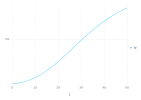

In [19]:
visualize(r14, :t, :W, kind = :line)

In [20]:
manipulate(Gomp, :t, :W;
    parameters = Gomp => (;
        :μ0 => 0:0.01:0.5,
        :D  => 0:0.01:0.2,
        :W0 => 0:0.1:10,
    ),
    stop = 100,
    kind = :line,
    ylim = (0, 200),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Gomp"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(26), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000ffff5c6f5b30, Task (runnable) @0x0000ffff5c6f5b30), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 281472228714000, 281472237734064)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                  

## 1.5. Chanter Growth Equation

- Eq

$$
\frac{dW}{dt} = \mu W \left( 1 - \frac{W}{B} \right) e^{-D t}
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | - | Time unit used in the model |
| $\mu$ | 0.3 | - | Specific growth rate |
| $B$ | 100 | - | Control parameter |
| $D$ | 0.065 | - | Decay in the specific growth rate |
| $W_0$ | 1 | - | Dry mass at time $t = 0$ |
| $W$ | - | - | Current dry mass |

In [21]:
@system Chan(Controller) begin
    t(context.clock.tick) ~ track
    
    μ       => 0.3   ~ preserve(parameter)
    B       => 100   ~ preserve(parameter)
    D       => 0.065 ~ preserve(parameter)
    W0      => 1     ~ preserve(parameter)

    W(μ, W, B, D, t) => begin
        μ*W * (1 - W/B) * ℯ^(-D*t)
    end ~ accumulate(init = W0)
end

Chan

In [22]:
r15 = simulate(Chan, stop = 100)

Row,time,t,μ,B,D,W0,W
,Quantity…,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0 hr,0.0,0.3,100.0,0.065,1.0,1.0
2,1.0 hr,1.0,0.3,100.0,0.065,1.0,1.297
3,2.0 hr,2.0,0.3,100.0,0.065,1.0,1.65688
4,3.0 hr,3.0,0.3,100.0,0.065,1.0,2.08612
5,4.0 hr,4.0,0.3,100.0,0.065,1.0,2.59034
6,5.0 hr,5.0,0.3,100.0,0.065,1.0,3.17401
7,6.0 hr,6.0,0.3,100.0,0.065,1.0,3.84016
8,7.0 hr,7.0,0.3,100.0,0.065,1.0,4.59021
9,8.0 hr,8.0,0.3,100.0,0.065,1.0,5.42378


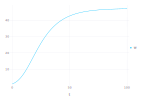

In [23]:
visualize(r15, :t, :W, kind = :line)

In [24]:
c15L = @config Chan => (; D = 0, B = 100)

D,=,0
B,=,100


In [25]:
c15G = @config Chan => (; D = 0.065, B = Inf)

D,=,0.065
B,=,Inf


In [26]:
c15I = @config Chan => (; D = 0.03, B = 100)

D,=,0.03
B,=,100


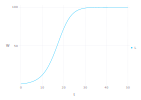

In [27]:
p15 = visualize(Chan, :t, :W, config = c15L, stop = 50, kind = :line, name = "L")

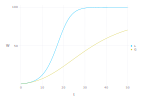

In [28]:
visualize!(p15, Chan, :t, :W, config = c15G, stop = 50, kind = :line, name = "G")

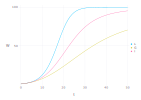

In [29]:
visualize!(p15, Chan, :t, :W, config = c15I, stop = 50, kind = :line, name = "I")

## 2. Derivative vs. Analytic Forms

### 2.1. Exponential Growth Equation (Analytic Form)

- Eq

$$
W = W_0 e^{\mu t}
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $t$ | - | - | Time unit used in the model |
| $\mu$ | 0.3 | - | Specific growth rate |
| $W_0$ | 1 | - | Dry mass at time $t = 0$ |
| $W$ | - | - | Current dry mass |

In [30]:
@system ExpoA(Controller) begin
    t(context.clock.tick)       ~ track
    μ           => 0.3          ~ preserve(parameter)
    W0          => 1            ~ preserve(parameter)
    W(W0, μ, t) => W0 * ℯ^(μ*t) ~ track
end

ExpoA

In [31]:
Cropbox.source(Expo)

quote
    #= In[3]:2 =#
    μ => 0.3 ~ preserve(parameter)
    #= In[3]:3 =#
    W0 => 1 ~ preserve(parameter)
    #= In[3]:4 =#
    W(μ, W) => μ * W ~ accumulate(init = W0)
    #= In[3]:6 =#
    t(context.clock.tick) ~ track
end

In [32]:
r21 = simulate(ExpoA, stop = 10)

Row,time,t,μ,W0,W
,Quantity…,Float64,Float64,Float64,Float64
1,0.0 hr,0.0,0.3,1.0,1.0
2,1.0 hr,1.0,0.3,1.0,1.34986
3,2.0 hr,2.0,0.3,1.0,1.82212
4,3.0 hr,3.0,0.3,1.0,2.4596
5,4.0 hr,4.0,0.3,1.0,3.32012
6,5.0 hr,5.0,0.3,1.0,4.48169
7,6.0 hr,6.0,0.3,1.0,6.04965
8,7.0 hr,7.0,0.3,1.0,8.16617
9,8.0 hr,8.0,0.3,1.0,11.0232


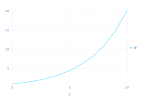

In [33]:
visualize(r21, :t, :W, kind = :line)

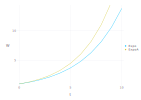

In [34]:
visualize([Expo, ExpoA], :t, :W; stop = 10, kind = :line)